In [1]:
import sklearn.datasets
import umap.umap_ as umap
import pandas as pd
from fdc.fdc import FDC
from fdc.visualize import plotMapping

In [2]:
dataset = sklearn.datasets.load_diabetes()

In [3]:
print(f"Shape: {dataset.data.shape}")

Shape: (442, 10)


In [4]:
for c in range(dataset.data.shape[1]):
    s = set(dataset.data[:,c])
    print(f"Feature {c} '{dataset.feature_names[c]}': {len(s)} items")

Feature 0 'age': 58 items
Feature 1 'sex': 2 items
Feature 2 'bmi': 163 items
Feature 3 'bp': 100 items
Feature 4 's1': 141 items
Feature 5 's2': 302 items
Feature 6 's3': 63 items
Feature 7 's4': 66 items
Feature 8 's5': 184 items
Feature 9 's6': 56 items


In [5]:
fdc = FDC()
fdc.nom_list = [1]
fdc.ord_list = [c for c in range(dataset.data.shape[1]) if c not in fdc.nom_list and c > 0 and len(set(dataset.data[:,c])) < 100]
fdc.cont_list = [c for c in range(dataset.data.shape[1]) if c not in fdc.nom_list and c not in fdc.ord_list]

In [6]:
fdcData5d = fdc.normalize(dataset.data)

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 6.73912 / 6.739s


/home/kristian/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1495: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(


FDC.normalize (clustering ORD): 2.56922 / 9.308s


/home/kristian/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1528: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


FDC.normalize (clustering NOM): 5.49109 / 14.799s
FDC.normalize (concat): 0.00037 / 14.800s
FDC.normalize (total): 0.00007 / 14.800s


In [7]:
fdcData5d

array([[-1.1011691 ,  1.6770428 ,  0.08368308,  1.513274  ,  1.221569  ],
       [ 0.78194   ,  0.5327575 , -1.1201099 , -1.9153475 , -0.75057316],
       [-0.39193642,  1.8509052 ,  0.00549793,  1.5460734 ,  1.2236346 ],
       ...,
       [ 0.07670375,  1.4290007 ,  0.23283504,  0.95729214,  1.0690477 ],
       [-0.04972544, -1.4419973 ,  1.1573405 ,  1.3241345 , -0.9784274 ],
       [ 0.44485548, -0.48027363, -0.74873555, -1.3730495 , -0.9516387 ]],
      dtype=float32)

In [8]:
fdcData5d, fdcData2d = fdc.normalize(dataset.data, with_2d_embedding=True)

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 2.36108 / 2.361s


/home/kristian/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1495: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(


FDC.normalize (clustering ORD): 2.40287 / 4.764s


/home/kristian/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1528: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


FDC.normalize (clustering NOM): 5.58962 / 10.354s
FDC.normalize (concat): 0.00034 / 10.354s
FDC.normalize (umap 5 -> 2): 2.35685 / 12.711s
FDC.normalize (total): 0.00030 / 12.711s


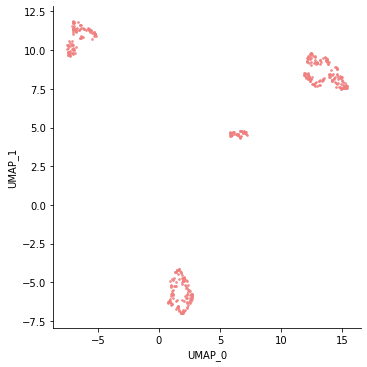

In [9]:
plotMapping(pd.DataFrame(data=fdcData2d, columns=['UMAP_0', 'UMAP_1']))

In [10]:
umapData = umap.UMAP(
    n_neighbors=30
    , min_dist=0.001
    , n_components=2
    , metric='euclidean'
    , random_state=42
    ).fit_transform(dataset.data)

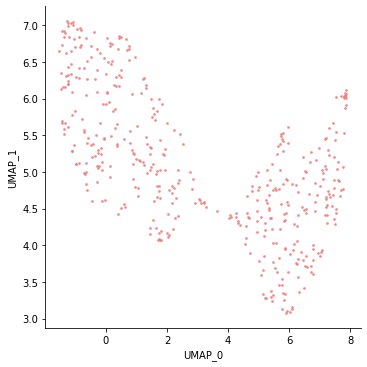

In [11]:
plotMapping(pd.DataFrame(data=umapData, columns=['UMAP_0', 'UMAP_1']))